In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [2]:
def system(r,theta,vr,vtheta):
    ar = (k/m) * (l-r)+g*np.cos(theta) + r*vtheta**2
    atheta = (-g/r)*np.sin(theta) - (2/r)*vr*vtheta
    return(vr,vtheta, ar,atheta)

In [3]:
def ar(r,theta,vr,vtheta):
    return (k/m) * (l-r)+g*np.cos(theta) + r*vtheta**2

In [4]:
def atheta (r,theta,vr,vtheta):
    return (-g/r)*np.sin(theta) - (2/r)*vr*vtheta

In [5]:
k = 5
l = 3
m = 2
g = 9.8
r0 = 15
theta0 = np.pi/8
vr0 = 0
vtheta0 = 0

In [6]:
Nsteps = 2001
tmin = 0
tmax = 30
t = np.linspace(tmin,tmax,Nsteps)

In [7]:
def Beeman(t,ar,atheta, r0,theta0,vr0,vtheta0):
    
    h = t[1]-t[0]
    
    r = np.zeros(len(t))
    theta = np.zeros(len(t))
    vr= np.zeros(len(t))
    vtheta = np.zeros(len(t))
    
    r[0] = r0
    theta[0] = theta0
    vr[0] = vr0
    vtheta[0] = vtheta0
    
    r[1] = r[0]+h*vr[0]
    theta[1] = theta[0]+h*vtheta[0]
    vr[1] = vr[0] +h*ar(r0,theta0,vr0,vtheta0)
    vtheta[1] = vtheta[0] + h*atheta(r0,theta0,vr0,vtheta0)
    
    
    for i in range(2,len(t)):
        r[i] = r[i-1] + h*vr[i-1] + (1/6)*(4*ar(r[i-1],theta[i-1],vr[i-1],vtheta[i-1]) - ar(r[i-2],theta[i-2],vr[i-2],vtheta[i-2]))*h**2
        vr[i] = vr[i-1] + 0.5*(3*ar(r[i-1],theta[i-1],vr[i-1],vtheta[i-1]) - ar(r[i-2],theta[i-2],vr[i-2],vtheta[i-2]))*h
        
        theta[i] = theta[i-1] + h* vtheta[i-1] + (1/6)*(4*atheta(r[i-1],theta[i-1],vr[i-1],vtheta[i-1]) - atheta(r[i-2],theta[i-2],vr[i-2],vtheta[i-2]))*h**2
        vtheta[i] = vtheta[i-1] + 0.5*(3*atheta(r[i-1],theta[i-1],vr[i-1],vtheta[i-1]) - atheta(r[i-2],theta[i-2],vr[i-2],vtheta[i-2]))*h
        
        #Corrector:
        
        vr[i] = vr[i-1] + (1/12)*(5*ar(r[i],theta[i], vr[i], vtheta[i]) + 8*ar(r[i-1],theta[i-1], vr[i-1], vtheta[i-1])- ar(r[i-2],theta[i-2], vr[i-2], vtheta[i-2]))*h
        vtheta[i] = vtheta[i-1] + (1/12)*(5*atheta(r[i],theta[i], vr[i], vtheta[i]) + 8*atheta(r[i-1],theta[i-1], vr[i-1], vtheta[i-1])- atheta(r[i-2],theta[i-2], vr[i-2], vtheta[i-2]))*h
    
    res = np.zeros((len(t),4))
    
    res[:,0] = r
    res[:,1] = theta
    res[:,2] = vr
    res[:,3] = vtheta
    
    return(res)
        

In [8]:
r = Beeman(t,ar,atheta, r0,theta0,vr0,vtheta0)

In [9]:
def reduce(t,factor):
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
    return np.array(Newt)
rt = reduce(t,20)
rr = reduce(r[:,0],20)
rtheta = reduce(r[:,1],20)


x = rr*np.cos(rtheta - np.pi/2)
y = rr*np.sin(rtheta - np.pi/2)

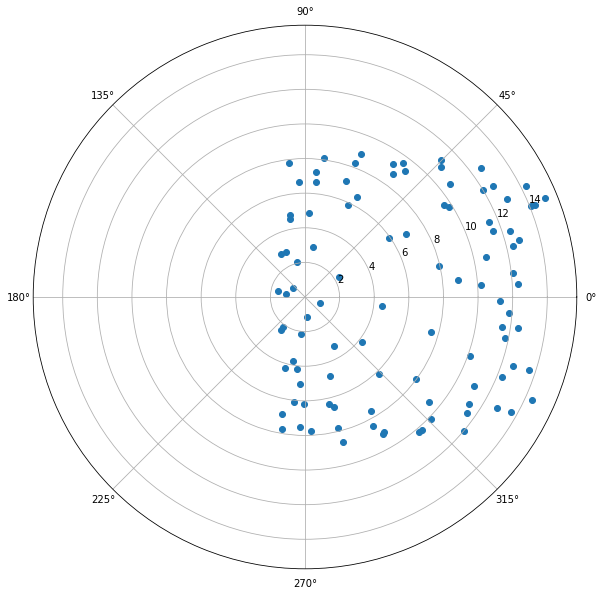

In [10]:
fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(1,1,1, projection='polar')
ax.scatter(rtheta,rr)

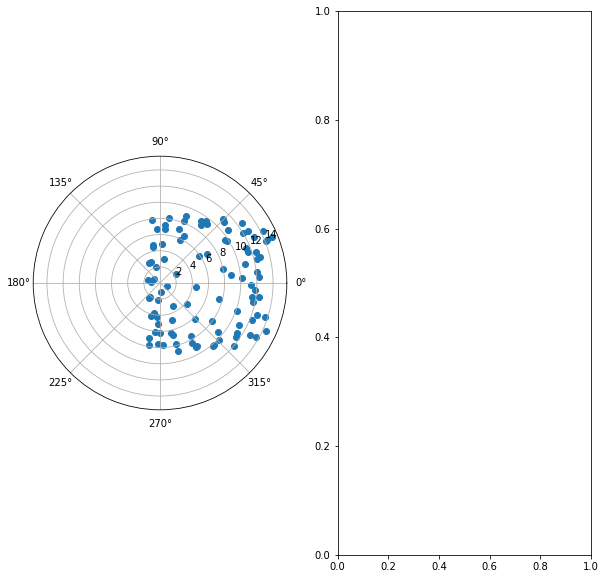

In [13]:
fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(1,2,1, projection='polar')
ax1.scatter(rtheta,rr)
ax2 = fig2.add_subplot(1,2,2,)
def init():
    ax2.set_xlim(-20,20)
    ax2.set_ylim(-20,20)

def Update(i):
    plot = ax.clear()
    init()
    plot = ax1.scatter(rtheta[i],rr[i],marker='.')
    plot = ax2.arrow(0,0,x[i],y[i])
    
    return plot

Animation = anim.FuncAnimation(fig2,Update,frames=len(rt),init_func=init)

In [14]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
Animation.save('Parcial1.mp4', writer=writer_)

RuntimeError: Requested MovieWriter (ffmpeg) not available